# Introduction to SciKit-Learn (and others)

In this lab, we will explore the basics of the SciKit-Learn library.

We will expderiment with some of the techniques we learned in the lecture:

- classification using decision trees
- association analysis using apriori
- clustering using k-means

# Importing the libraries

In [1]:
import sklearn as sk
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
targets = pd.DataFrame(iris.target, columns=['target'])

## Classification using decision trees

Learning algorithms in SciKit-Learn are implemented in classes. The first step is to import the class that implements the algorithm we want to use.
All learning algorithms share a common interface, which makes it easy to switch from one algorithm to another. The interface is defined in the base class `BaseEstimator`, which
provides a default implementation of the necessary methods, specifically of the methods `fit` and `predict`.

By calling the `fit` method, we train the model on the training data. 
Training modifies the model parameters of the object in place, so we don't need to assign the result to a new variable, but we can use the returned value to chain method calls as in the example below:
    
```python
clf = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
```

The `predict` method is used to predict the class labels for new data.



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(data, targets)

DecisionTreeClassifier()

## Evaluating the accuracy of the model

In [5]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

1.0

## Plotting the decision tree

Some support for plotting decision trees is provided by the `export_graphviz` function in the `tree` module of SciKit-Learn.

In [6]:

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)

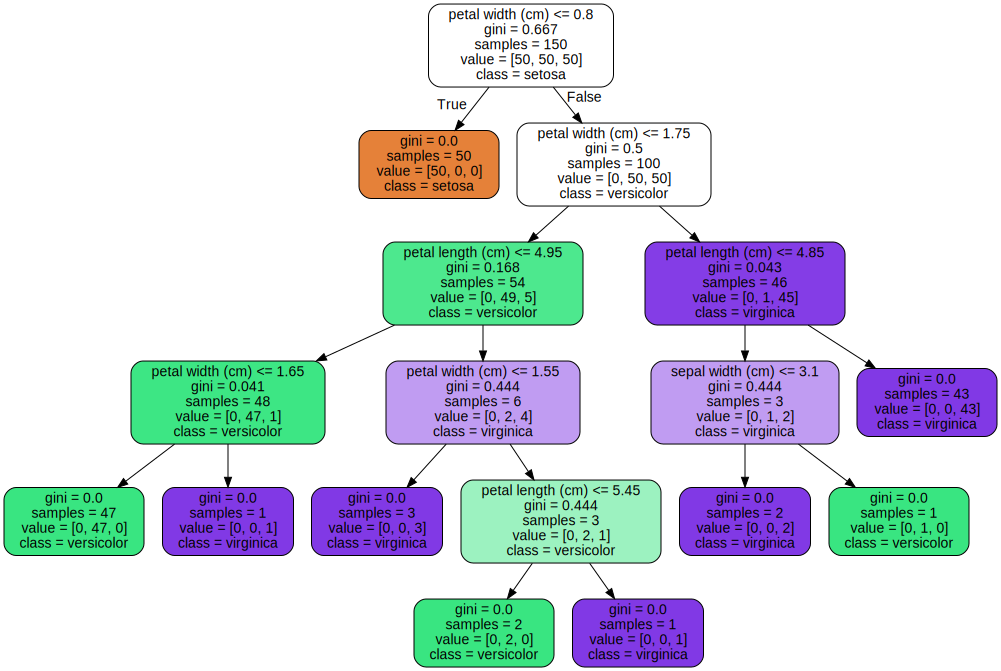

In [7]:
graph


More sophisticated tools are available, for instanceh the dtreeviz library provides very nice visualizations of decision trees.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

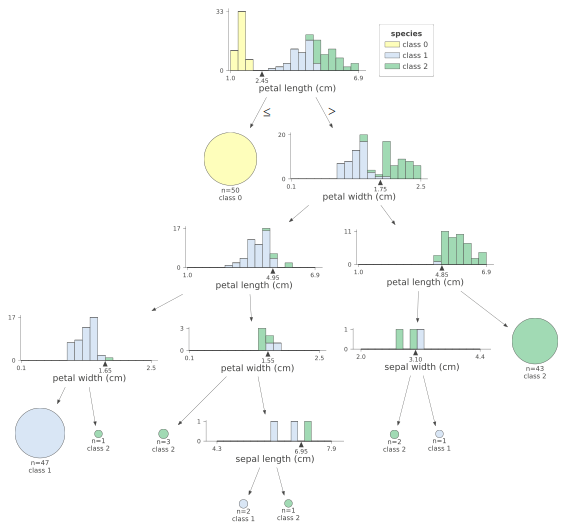

In [8]:
from dtreeviz.trees import dtreeviz, ctreeviz_bivar  # remember to load the package

clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

dtreeviz(clf, iris.data, iris.target,
            target_name='species',
            feature_names=iris.feature_names)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

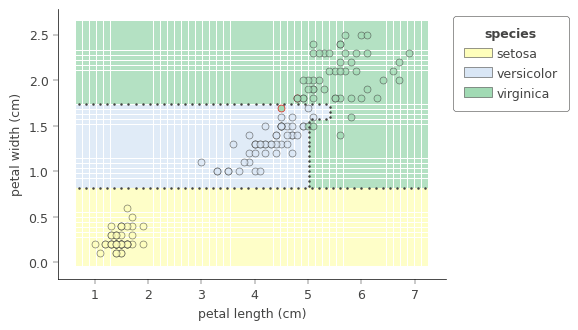

In [9]:
from dtreeviz import clfviz
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier()

data = iris.data
targets = iris.target
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.1)
X_train = X_train[:, 2:]
X_test = X_test[:, 2:]

clf.fit(X_train, y_train)

clfviz(clf, data[:,2:], targets,
       feature_names=iris.feature_names[2:],
       class_names = iris.target_names.tolist(),
       target_name='species')


# Association analysis using apriori algorithm

SciKit-Learn does not provide an implementation of the apriori algorithm, but we can use the `mlxtend` library, which provides a Python implementation of some frequent pattern mining algorithms.

In [11]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

transactions = [["Bread", "Butter", "Diapers", "Milk"],
                ["Coffee", "Sugar", "Cookies", "Salmon"],
                ["Bread", "Butter", "Coffee", "Diapers", "Milk", "Eggs"],
                ["Bread", "Butter", "Salmon", "Chicken"],
                ["Eggs", "Bread", "Butter"],
                ["Salmon", "Diapers", "Milk"],
                ["Bread", "Tea", "Sugar", "Eggs"],
                ["Coffee", "Sugar", "Chicken", "Eggs"],
                ["Bread", "Diapers", "Milk", "Salt"],
                ["Tea", "Eggs", "Cookies", "Diapers", "Milk"]]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [12]:
# Mining frequent itemsets

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Bread)
1,0.4,(Butter)
2,0.3,(Coffee)
3,0.5,(Diapers)
4,0.5,(Eggs)
5,0.5,(Milk)
6,0.3,(Salmon)
7,0.3,(Sugar)
8,0.4,"(Bread, Butter)"
9,0.3,"(Bread, Diapers)"


In [13]:
# extracts association rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Bread),0.4,0.6,0.4,1.0,1.666667,0.16,inf
1,(Milk),(Diapers),0.5,0.5,0.5,1.0,2.000000,0.25,inf
2,(Diapers),(Milk),0.5,0.5,0.5,1.0,2.000000,0.25,inf
3,"(Bread, Milk)",(Diapers),0.3,0.5,0.3,1.0,2.000000,0.15,inf
4,"(Bread, Diapers)",(Milk),0.3,0.5,0.3,1.0,2.000000,0.15,inf


# Clustering analysis

In [14]:

from sklearn.cluster import KMeans

articles = [{"dollar": 1, "industry": 4, "country": 2, "loan": 3, "deal": 2, "government": 2 },
            {"machinery": 2, "labor": 3, "market": 4, "industry": 2, "work": 3, "country": 1 },
            {"job": 5, "inflation": 3, "rise": 2, "jobless": 2, "market": 3, "country": 2, "index": 3 },
            {"domestic": 3, "forecast": 2, "gain": 1, "market": 2, "sale": 3, "price": 2 },
            {"patient": 4, "symptom": 2, "drug": 3, "health": 2, "clinic": 2, "doctor": 2 },
            {"pharmaceutical": 2, "company": 3, "drug": 2, "vaccine": 1, "flu": 3 },
            {"death": 2, "cancer": 4, "drug": 3, "public": 4, "health": 3, "director": 2 },
            {"medical": 2, "cost": 3, "increase": 2, "patient": 2, "health": 3, "care": 1 }]


# convert to dataframe setting nans to 0

df = pd.DataFrame(articles).fillna(0)
df

,dollar,industry,country,loan,deal,government,machinery,labor,market,work,...,vaccine,flu,death,cancer,public,director,medical,cost,increase,care
0,1.0,4.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0


In [15]:

# fit kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

# predict clusters
kmeans.predict(df)

array([1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [16]:
clusters = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
clusters.index = ['cluster 1', 'cluster 2']

clusters

,dollar,industry,country,loan,deal,government,machinery,labor,market,work,...,vaccine,flu,death,cancer,public,director,medical,cost,increase,care
cluster 1,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,0.25,0.75,0.5,1.0,1.0,0.5,0.5,0.75,0.5,0.25
cluster 2,0.25,1.5,1.25,0.75,0.5,0.5,0.5,0.75,2.25,0.75,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
